# Required Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Step 1: Load the dataset

In [16]:


titanic_data = pd.read_csv("tested.csv")
#Dataset link avvailable in readme file


# Step 2: Understand the structure of the dataset

In [17]:

print(titanic_data.head())  # Display the first few rows of the dataset
print(titanic_data.info())  # Display information about the dataset


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

# Step 3: Handle missing values


### Check for missing values

In [19]:


print(titanic_data.isnull().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Fill missing values for 'Age' with the median age

In [20]:

median_age = titanic_data['Age'].median()
titanic_data['Age'].fillna(median_age, inplace=True)



## Drop 'Cabin' column due to too many missing values

In [21]:

titanic_data.drop(columns=['Cabin'], inplace=True)




# Step 4: Explore the distributions of numerical variables

C:\Users\shah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


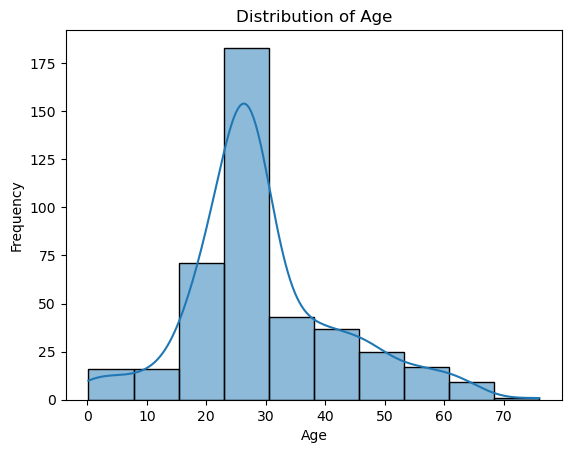

In [22]:

sns.histplot(titanic_data['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



# Distribution of Gender

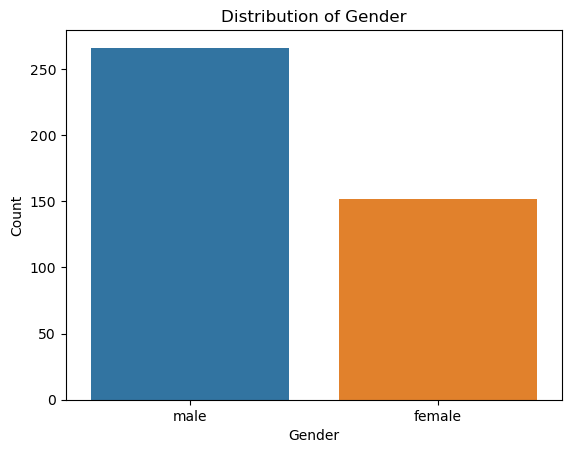

In [23]:
sns.countplot(x='Sex', data=titanic_data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



# Step 5: Explore relationships between variables

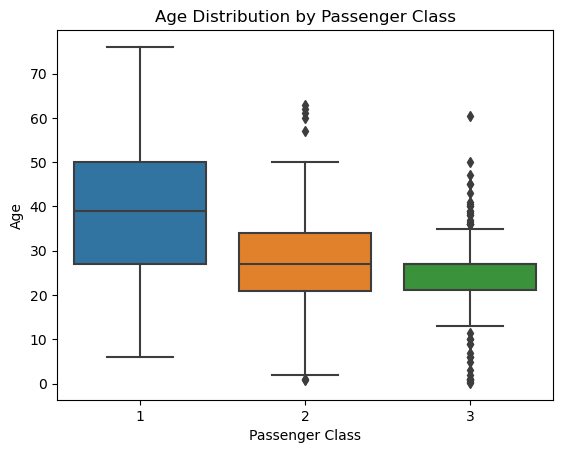

In [24]:

sns.boxplot(x='Pclass', y='Age', data=titanic_data)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()



# Survival Rate by Passenger Class

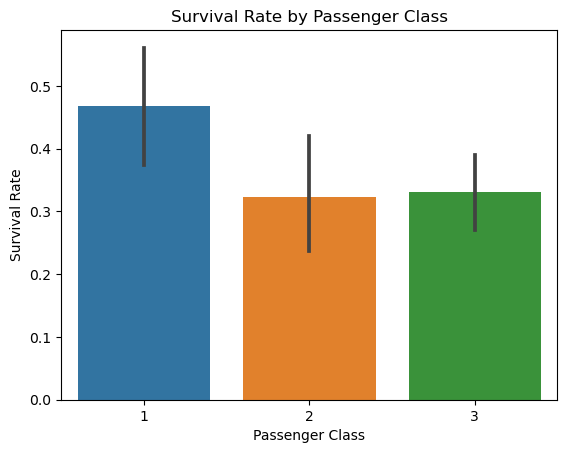

In [25]:
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()



# Step 6: Identify patterns and trends in the data
### Explore survival rate by gender

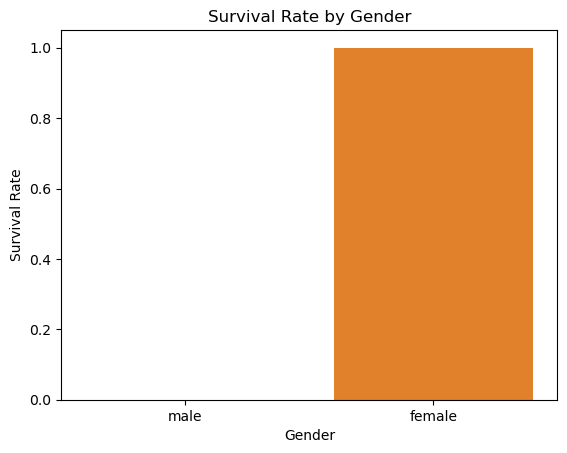

In [26]:

sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()



# Explore survival rate by age group

C:\Users\shah\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


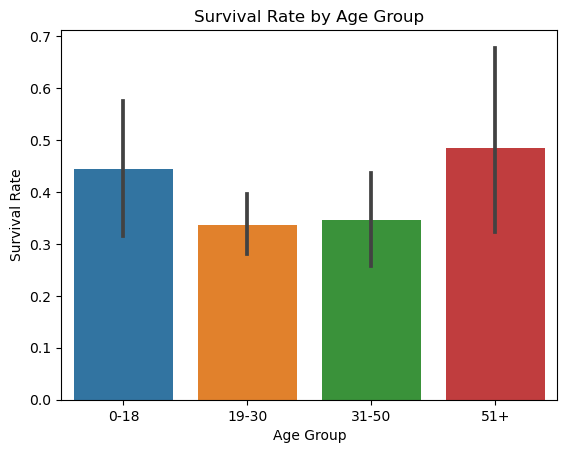

In [27]:

titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '51+'])
sns.barplot(x='AgeGroup', y='Survived', data=titanic_data)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()